<a href="https://colab.research.google.com/github/ddale23/k_means_combine/blob/main/qb_combine_k_means_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing the packages that I need
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Data set that I created in R using 2020 nflfastR data
df = pd.read_csv ('https://raw.githubusercontent.com/ddale23/k_means_combine/main/qb_combine_dataset.csv')

In [ ]:
#selecting columns I want to include
convert_data = df[['player_name', 'inch_height', 'wt']]


In [ ]:
#data set from 2022 qbs
qbs_combine = pd.read_csv('https://raw.githubusercontent.com/ddale23/k_means_combine/main/qb_2022_combine.csv')

In [ ]:
#select the three columns
qbs_combine['wt'] = pd.to_numeric(qbs_combine['weight'])


In [ ]:
convert_data_2022 = qbs_combine[['player_name', 'inch_height', 'wt']]

In [ ]:
convert_data = pd.concat([convert_data_2022, convert_data], ignore_index=True, axis=0)

In [ ]:
#converting to numpy array
array_nfl_data = convert_data.to_numpy()

In [ ]:
array_nfl_data

array([['Jack Coan', 75, 218],
       ['Matt Corral', 74, 212],
       ['Dustin Crum', 73, 210],
       ['Kaleb Eleby', 73, 208],
       ['Sam Howell', 73, 218],
       ['Cole Kelley', 79, 249],
       ["D'Eriq King", 69, 196],
       ['EJ Perry', 74, 211],
       ['Kenny Pickett', 75, 217],
       ['Brock Purdy', 75, 212],
       ['Desmond Ridder', 75, 211],
       ['Carson Strong', 75, 226],
       ['Skylar Thompson', 75, 217],
       ['Malik Willis', 74, 219],
       ['Bailey Zappe', 72, 215],
       ['Tom Brady', 76, 211],
       ['Marc Bulger', 74, 208],
       ['Giovanni Carmazzi', 75, 224],
       ['Joe Hamilton', 70, 192],
       ['Todd Husak', 75, 216],
       ['Jarious Jackson', 72, 226],
       ['Tee Martin', 74, 227],
       ['Chad Pennington', 75, 229],
       ['Tim Rattay', 72, 215],
       ['Chris Redman', 75, 222],
       ['Spergon Wynn', 75, 229],
       ['Josh Booty', 74, 221],
       ['Drew Brees', 72, 213],
       ['Quincy Carter', 74, 225],
       ['Josh Heupel', 7

In [ ]:
#separating data from labels part 1
qb_labels = array_nfl_data[: , 0]

In [ ]:
#separating data from labels part 2
qb_data = array_nfl_data[: , 1:]

In [ ]:
#Standardizing data within my data set to give kmeans clusters a better performance and less skew
scaler = StandardScaler()
scaled_features = scaler.fit_transform(qb_data)
scaled_features[:5]

array([[-0.00225973, -0.50173898],
       [-0.57623183, -1.05784822],
       [-1.15020392, -1.24321797],
       [-1.15020392, -1.42858772],
       [-1.15020392, -0.50173898]])

In [ ]:
#setting up kmeans
kmeans = KMeans(
    init = "random",
    n_clusters = 5,
    n_init = 100, #num initializations
    max_iter = 500, #number of max iterations per initialization
    random_state = 42 #helps reproduce results
)

kmeans.fit(scaled_features)

KMeans(init='random', max_iter=500, n_clusters=5, n_init=100, random_state=42)

In [ ]:
kmeans.fit(scaled_features)

KMeans(init='random', max_iter=500, n_clusters=5, n_init=100, random_state=42)

In [ ]:
#viewing labels for kmeans
final_labs = kmeans.labels_
kmeans.labels_

array([0, 0, 1, 1, 0, 3, 1, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 2, 1, 0, 2, 2,
       2, 1, 2, 2, 0, 1, 2, 0, 0, 2, 4, 2, 1, 4, 2, 0, 2, 0, 2, 2, 0, 0,
       4, 2, 0, 2, 0, 0, 0, 3, 4, 3, 4, 1, 2, 2, 2, 4, 2, 0, 3, 2, 2, 4,
       3, 3, 2, 1, 3, 4, 2, 4, 2, 1, 0, 4, 4, 2, 0, 3, 2, 0, 2, 0, 2, 4,
       4, 0, 1, 0, 4, 4, 0, 4, 0, 4, 4, 4, 3, 2, 0, 2, 4, 0, 0, 2, 0, 3,
       2, 2, 0, 4, 4, 4, 2, 4, 2, 3, 2, 2, 2, 2, 1, 4, 2, 4, 2, 2, 2, 0,
       4, 0, 3, 2, 0, 3, 4, 4, 2, 3, 0, 3, 2, 4, 0, 0, 2, 0, 3, 2, 0, 4,
       4, 3, 4, 0, 1, 2, 2, 4, 4, 3, 2, 0, 0, 4, 0, 4, 2, 0, 0, 0, 2, 1,
       0, 4, 1, 4, 3, 0, 0, 2, 4, 4, 2, 4, 0, 4, 0, 0, 4, 0, 4, 0, 3, 0,
       3, 2, 3, 3, 0, 0, 0, 4, 2, 2, 2, 0, 4, 3, 0, 2, 0, 0, 2, 4, 0, 4,
       4, 4, 0, 0, 0, 2, 4, 4, 1, 2, 1, 2, 0, 4, 0, 4, 0, 3, 2, 4, 4, 0,
       4, 4, 1, 1, 0, 2, 0, 2, 4, 0, 3, 0], dtype=int32)

In [ ]:
#joining labels for kmeans with labels from original data set
nfl_clustered = np.vstack((final_labs, qb_labels)).T
nfl_clustered

array([[0, 'Jack Coan'],
       [0, 'Matt Corral'],
       [1, 'Dustin Crum'],
       [1, 'Kaleb Eleby'],
       [0, 'Sam Howell'],
       [3, 'Cole Kelley'],
       [1, "D'Eriq King"],
       [0, 'EJ Perry'],
       [0, 'Kenny Pickett'],
       [0, 'Brock Purdy'],
       [0, 'Desmond Ridder'],
       [2, 'Carson Strong'],
       [0, 'Skylar Thompson'],
       [0, 'Malik Willis'],
       [1, 'Bailey Zappe'],
       [0, 'Tom Brady'],
       [0, 'Marc Bulger'],
       [2, 'Giovanni Carmazzi'],
       [1, 'Joe Hamilton'],
       [0, 'Todd Husak'],
       [2, 'Jarious Jackson'],
       [2, 'Tee Martin'],
       [2, 'Chad Pennington'],
       [1, 'Tim Rattay'],
       [2, 'Chris Redman'],
       [2, 'Spergon Wynn'],
       [0, 'Josh Booty'],
       [1, 'Drew Brees'],
       [2, 'Quincy Carter'],
       [0, 'Josh Heupel'],
       [0, 'Mike McMahon'],
       [2, 'Jesse Palmer'],
       [4, 'Sage Rosenfels'],
       [2, 'Marques Tuiasosopo'],
       [1, 'Michael Vick'],
       [4, 'Chris Weink

In [ ]:
#piecing together each output
data_len = len(nfl_clustered)

zero_list = []
zero_count = 0

one_list = []
one_count = 0

two_list = []
two_count = 0

three_list = []
three_count = 0

four_list = []
four_count = 0

five_list = []
five_count = 0



for i in range(data_len):
  if nfl_clustered[i,0] == 0:
    zero_list.append(nfl_clustered[i,1])
    zero_count += 1

  elif nfl_clustered[i,0] == 1:
    one_list.append(nfl_clustered[i,1])
    one_count += 1

  elif nfl_clustered[i,0] == 2:
    two_list.append(nfl_clustered[i,1])
    two_count += 1

  elif nfl_clustered[i,0] == 3:
    three_list.append(nfl_clustered[i,1])
    three_count += 1

  elif nfl_clustered[i,0] == 4:
    four_list.append(nfl_clustered[i,1])
    four_count += 1

  else:
     print('error')

print('Grouping Zero includes', zero_count, 'QBs:\n', zero_list, '\n') 
print('Grouping One includes', one_count, 'QBs:\n', one_list, '\n') 
print('Grouping Two includes', two_count, 'QBs:\n', two_list, '\n') 
print('Grouping Three includes', three_count, 'QBs:\n', three_list, '\n') 
print('Grouping Four includes', four_count, 'QBs:\n', four_list, '\n') 
print('Total QBs in Sample:', zero_count+ one_count + two_count + three_count + four_count )

Grouping Zero includes 80 QBs:
 ['Jack Coan', 'Matt Corral', 'Sam Howell', 'EJ Perry', 'Kenny Pickett', 'Brock Purdy', 'Desmond Ridder', 'Skylar Thompson', 'Malik Willis', 'Tom Brady', 'Marc Bulger', 'Todd Husak', 'Josh Booty', 'Josh Heupel', 'Mike McMahon', 'Ronald Curry', 'Brandon Doman', 'Joey Harrington', 'Kurt Kittner', 'Patrick Ramsey', 'Ken Dorsey', 'Rex Grossman', 'Kliff Kingsbury', 'Luke McCown', 'Adrian McPherson', 'Alex Smith', 'Brodie Croyle', 'Bruce Gradkowski', 'Ingle Martin', 'D.J. Shockley', 'John Beck', 'Kevin Kolb', 'Isaiah Stanback', 'Colt Brennan', 'Alex Brink', 'Dennis Dixon', 'Josh Johnson', 'Colt McCoy', 'Zac Robinson', 'Andy Dalton', 'Greg McElroy', 'Tyrod Taylor', 'T.J. Yates', 'Kirk Cousins', 'Chandler Harnish', 'Brandon Weeden', 'Sean Renfree', 'Geno Smith', 'Tyler Wilson', 'Teddy Bridgewater', 'Derek Carr', 'David Fales', 'A.J. McCarron', 'Keith Wenning', 'Garrett Grayson', 'Brandon Allen', 'Connor Cook', 'Brandon Doughty', 'Jared Goff', 'Kevin Hogan', 'Cody

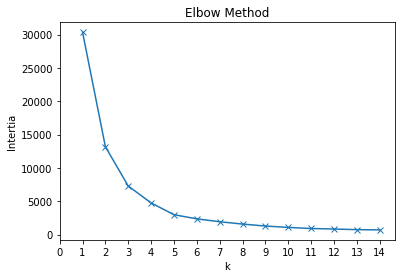

In [ ]:
intertia = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters = k)
    km = km.fit(qb_data)
    intertia.append(km.inertia_)
plt.plot(K, intertia, marker= "x")
plt.xlabel('k')
plt.xticks(np.arange(15))
plt.ylabel('Intertia')
plt.title('Elbow Method')
plt.show()

In [ ]:
#take labels and compose data set to bring into R with k-means labels
final_data = np.concatenate((nfl_clustered, array_nfl_data), axis = 1)

In [ ]:
final_data

array([[0, 'Jack Coan', 'Jack Coan', 75, 218],
       [0, 'Matt Corral', 'Matt Corral', 74, 212],
       [1, 'Dustin Crum', 'Dustin Crum', 73, 210],
       ...,
       [0, 'Davis Mills', 'Davis Mills', 75, 217],
       [3, 'Kyle Trask', 'Kyle Trask', 77, 236],
       [0, 'Zach Wilson', 'Zach Wilson', 74, 214]], dtype=object)

In [ ]:
final_data = pd.DataFrame(
    final_data,
    columns = ['cluster', 'qb_name', 'qb_sec', 'height', 'weight']
)

In [ ]:
from google.colab import files
final_data.to_csv('final_data.csv') 
files.download('final_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>